<center> <br>
<h1> Investing in Nashville</h1>

## Jyothi Chandrakanth

## ALY6020: Predictive Analytics</center>


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
pd.options.display.max_columns = 100
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [24]:
#Loading the dataset

df = pd.read_csv('Nashville_housing_data_2013_2016.csv')
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0


## EDA

In [25]:
df.shape

(56636, 31)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [27]:
#Remove all the unwanted columns
df.drop(['Unnamed: 0','Unnamed: 0.1','Parcel ID','Property Address','Legal Reference','Owner Name','Address','City','State','Neighborhood','image','Property City', 'Sale Date','Suite/ Condo   #'], axis = 1, inplace = True)


In [28]:
df.columns

Index(['Land Use', 'Sale Price', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [29]:
missing_values = df.isnull().sum() * 100 / len(df)
print(round(missing_values,2))

Land Use                              0.00
Sale Price                            0.00
Sold As Vacant                        0.00
Multiple Parcels Involved in Sale     0.00
Acreage                              54.06
Tax District                         54.06
Land Value                           54.06
Building Value                       54.06
Total Value                          54.06
Finished Area                        57.33
Foundation Type                      57.33
Year Built                           57.33
Exterior Wall                        57.33
Grade                                57.33
Bedrooms                             57.34
Full Bath                            57.14
Half Bath                            57.37
dtype: float64


In [30]:
df1 = df.dropna()

In [31]:
missing_values = df1.isnull().sum() * 100 / len(df1)
print(round(missing_values,2))

Land Use                             0.0
Sale Price                           0.0
Sold As Vacant                       0.0
Multiple Parcels Involved in Sale    0.0
Acreage                              0.0
Tax District                         0.0
Land Value                           0.0
Building Value                       0.0
Total Value                          0.0
Finished Area                        0.0
Foundation Type                      0.0
Year Built                           0.0
Exterior Wall                        0.0
Grade                                0.0
Bedrooms                             0.0
Full Bath                            0.0
Half Bath                            0.0
dtype: float64


In [32]:
df1.shape

(24013, 17)

In [33]:
for i in df1.columns:
    print('column: ', i)
    print(df1[i].unique())

column:  Land Use
['SINGLE FAMILY' 'VACANT RES LAND' 'DUPLEX' 'ZERO LOT LINE' 'TRIPLEX'
 'RESIDENTIAL COMBO/MISC' 'CHURCH' 'QUADPLEX' 'STRIP SHOPPING CENTER'
 'DORMITORY/BOARDING HOUSE' 'PARSONAGE' 'SPLIT CLASS' 'GREENBELT'
 'MOBILE HOME' 'OFFICE BLDG (ONE OR TWO STORIES)'
 'VACANT RESIDENTIAL LAND' 'FOREST' 'CONVENIENCE MARKET WITHOUT GAS'
 'CLUB/UNION HALL/LODGE' 'LIGHT MANUFACTURING'
 'ONE STORY GENERAL RETAIL STORE' 'DAY CARE CENTER'
 'APARTMENT: LOW RISE (BUILT SINCE 1960)'
 'TERMINAL/DISTRIBUTION WAREHOUSE' 'NON-PROFIT CHARITABLE SERVICE'
 'GREENBELT/RES\r\nGRRENBELT/RES']
column:  Sale Price
[191500 202000  32000 ... 115700 148942 202044]
column:  Sold As Vacant
['No' 'Yes']
column:  Multiple Parcels Involved in Sale
['No' 'Yes']
column:  Acreage
[1.700e-01 1.100e-01 3.400e-01 2.000e-01 4.000e-01 2.300e-01 2.900e-01
 4.100e-01 2.500e-01 2.700e-01 3.500e-01 3.600e-01 4.400e-01 4.200e-01
 1.900e-01 7.600e-01 5.200e-01 2.800e-01 1.500e-01 8.000e-02 2.200e-01
 1.800e-01 1.400e-01 1.

In [34]:
df1['PriceType'] = df1['Sale Price'] - df1['Total Value']

In [35]:
df1.head(5)

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,PriceType
1,SINGLE FAMILY,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,23200.0
2,SINGLE FAMILY,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,10200.0
3,SINGLE FAMILY,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,-236700.0
4,SINGLE FAMILY,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,-62800.0
5,SINGLE FAMILY,93736,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,-19564.0


In [36]:
#Replacing the values based on Under or Overpriced

df1.loc[df1["PriceType"]> 0, "PriceType"] = 1
df1.loc[df1["PriceType"] <= 0, "PriceType"] = 0

In [37]:
#df1.drop(['Sale Price', 'Total Value'], axis = 1, inplace = True)

In [38]:
df1.columns

Index(['Land Use', 'Sale Price', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath', 'PriceType'],
      dtype='object')

<AxesSubplot:xlabel='Total Value', ylabel='Count'>

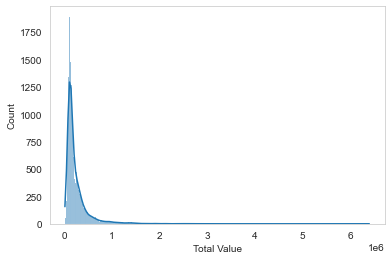

In [39]:
sns.histplot(data= df1, x= 'Total Value', kde=True)

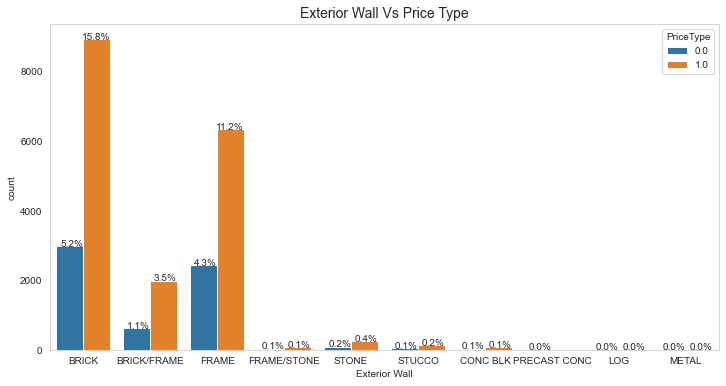

In [40]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="Exterior Wall", hue="PriceType", data=df1)
plt.title('Exterior Wall Vs Price Type', fontsize=14)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

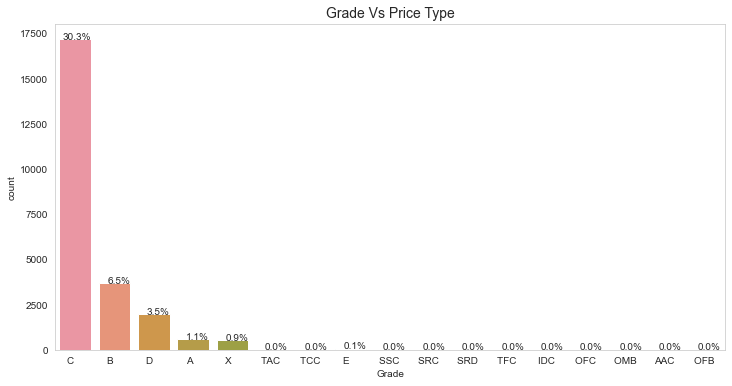

In [41]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="Grade", data=df1)
plt.title('Grade Vs Price Type', fontsize=14)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

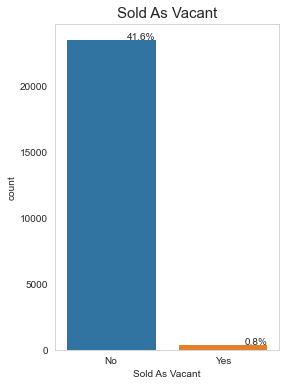

In [42]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(4,6))
total = float(len(df))
ax = sns.countplot(x="Sold As Vacant", data=df1)
plt.title('Sold As Vacant', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

<AxesSubplot:xlabel='Acreage', ylabel='Total Value'>

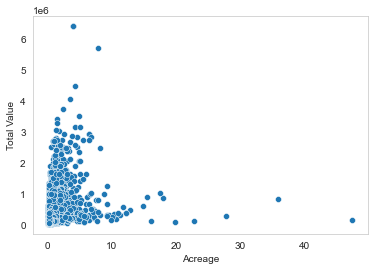

In [43]:
sns.scatterplot(data=df1, x="Acreage", y='Total Value')

<AxesSubplot:xlabel='Acreage', ylabel='Sale Price'>

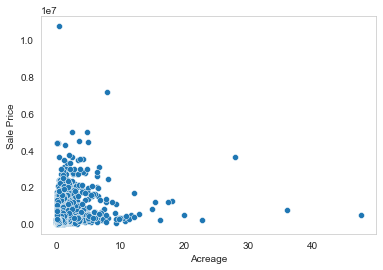

In [44]:
sns.scatterplot(data=df1, x="Acreage", y='Sale Price')

<AxesSubplot:xlabel='Sale Price', ylabel='Total Value'>

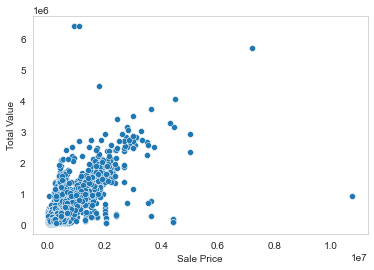

In [45]:
sns.scatterplot(data=df1, x="Sale Price", y='Total Value')

<AxesSubplot:xlabel='Count', ylabel='Land Use'>

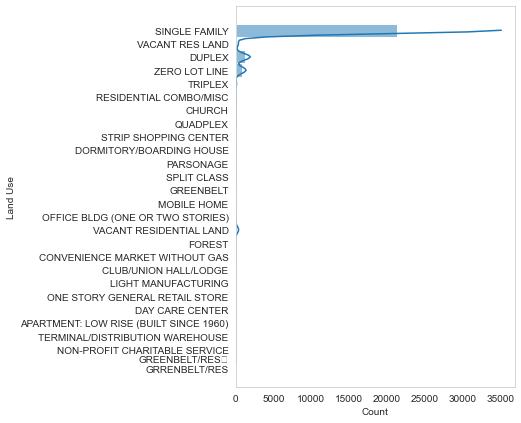

In [46]:
fig, b = plt.subplots(figsize=(5, 7))
sns.histplot(data= df1, y= 'Land Use', kde=True)

<AxesSubplot:xlabel='Sale Price', ylabel='Land Value'>

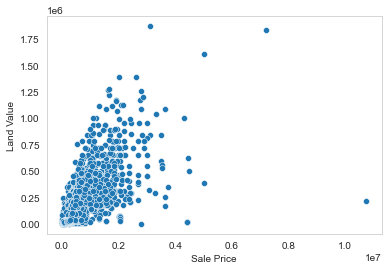

In [47]:
sns.scatterplot(data=df1, x="Sale Price", y='Land Value')

<AxesSubplot:xlabel='Total Value', ylabel='Bedrooms'>

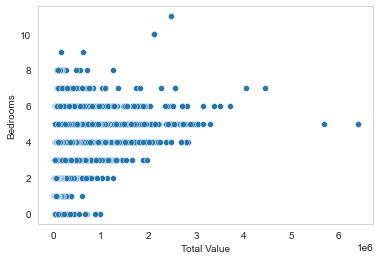

In [48]:
sns.scatterplot(data=df1, y="Bedrooms", x='Total Value')

<AxesSubplot:xlabel='Total Value', ylabel='Finished Area'>

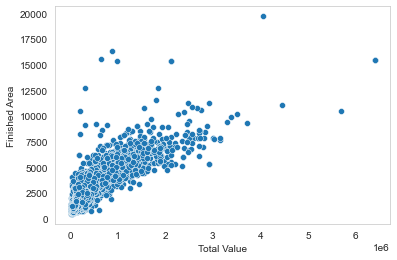

In [49]:
sns.scatterplot(data=df1, y="Finished Area", x='Total Value')

<AxesSubplot:xlabel='Sale Price', ylabel='Finished Area'>

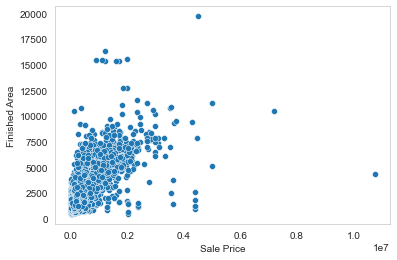

In [50]:
sns.scatterplot(data=df1, y="Finished Area", x='Sale Price')

<AxesSubplot:xlabel='Total Value', ylabel='Building Value'>

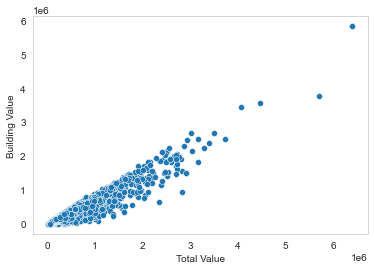

In [51]:
sns.scatterplot(data=df1, y="Building Value", x='Total Value')

<AxesSubplot:xlabel='Foundation Type', ylabel='Sale Price'>

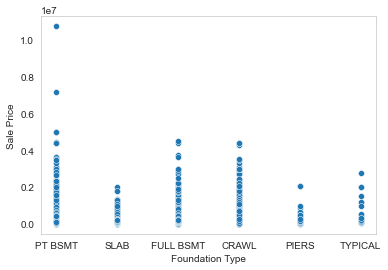

In [52]:
sns.scatterplot(data=df1, x="Foundation Type", y='Sale Price')

In [53]:
df1.head(5)

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,PriceType
1,SINGLE FAMILY,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,1.0
2,SINGLE FAMILY,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,1.0
3,SINGLE FAMILY,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,0.0
4,SINGLE FAMILY,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,0.0
5,SINGLE FAMILY,93736,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,0.0


In [54]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

columns = ['Land Use', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District',
       'Land Value', 'Building Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath']

for name in columns:
    df1[name] = le.fit_transform(df1[name])

In [55]:
df1.head()

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,PriceType
1,18,191500,0,0,13,6,163,1170,168300.0,462,3,49,0,3,2,1,0,1.0
2,18,202000,0,0,7,1,176,1404,191800.0,2410,4,108,1,3,3,2,1,1.0
3,18,32000,0,0,13,6,107,2241,268700.0,2538,1,56,1,2,4,2,0,0.0
4,18,102000,0,0,30,6,107,1207,164800.0,2096,0,18,3,3,2,1,0,0.0
5,18,93736,0,0,13,6,107,687,113300.0,339,0,53,3,3,2,1,0,0.0


In [56]:
#Predictor and outcome variables
X = df1.drop(['PriceType'], axis=1)
y = df1['PriceType']

In [57]:
#Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [58]:
print(X_train.shape)
print(X_test.shape)

(16809, 17)
(7204, 17)


<AxesSubplot:xlabel='PriceType', ylabel='count'>

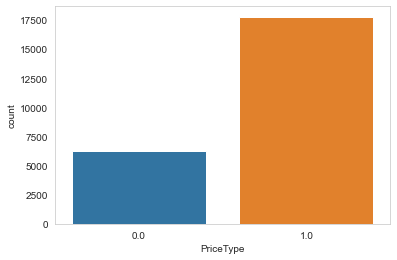

In [59]:
sns.countplot(y)

## Logistic Regression

In [60]:
#!pip install imblearn

In [61]:
#Fitting the model 
from datetime import datetime
start_time = datetime.now()
lr = sm.add_constant(X_train) 
lr_model = sm.OLS(y_train, lr) 
lr_fit = lr_model.fit()

In [62]:
#Print the results 
print(lr_fit.summary())
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

                            OLS Regression Results                            
Dep. Variable:              PriceType   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     229.8
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:26:55   Log-Likelihood:                -8182.6
No. Observations:               16809   AIC:                         1.640e+04
Df Residuals:                   16791   BIC:                         1.654e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [63]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

<AxesSubplot:>

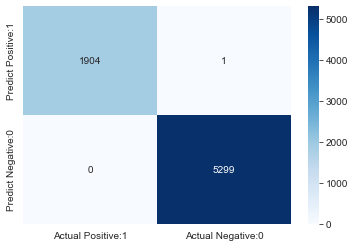

In [64]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred), columns=['Actual Positive:1', 'Actual Negative:0'], index= ['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')


In [65]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))


Accuracy: 0.9998611882287618
Precision: 0.999811320754717
Recall: 1.0
Mean Squared Error: 0.000138811771238201


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1905
         1.0       1.00      1.00      1.00      5299

    accuracy                           1.00      7204
   macro avg       1.00      1.00      1.00      7204
weighted avg       1.00      1.00      1.00      7204



## Decision Tree

Duration: 0:00:00.126580


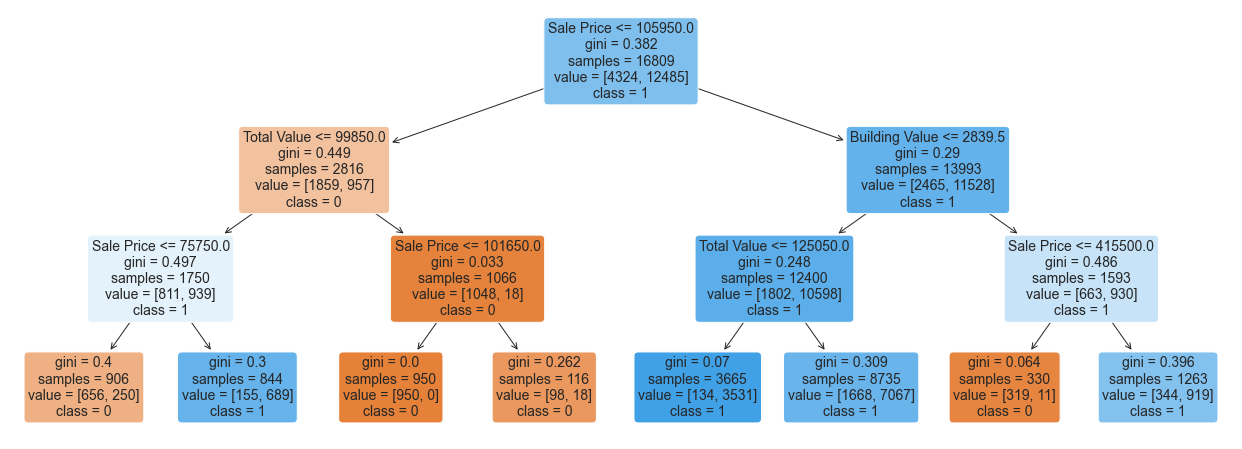

In [67]:
start_time = datetime.now()
d_tree = DecisionTreeClassifier(max_depth=3)
d_tree.fit(X_train,y_train)
plt.figure(figsize=(22,8))
plot=plot_tree(d_tree,feature_names=X.columns.values.tolist(),class_names=['0','1'],
                    filled=True,rounded=True,fontsize=14)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [68]:
y_pred_dt = d_tree.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_dt))

Accuracy: 0.8378678511937813
Precision: 0.8310626702997275
Recall: 0.9784865068880921
Mean Squared Error: 0.16213214880621876


In [70]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.45      0.59      1905
         1.0       0.83      0.98      0.90      5299

    accuracy                           0.84      7204
   macro avg       0.86      0.71      0.75      7204
weighted avg       0.84      0.84      0.82      7204



In [71]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(d_tree, n_features_to_select=2)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['Sale Price', 'Total Value'], dtype=object)

## Random Forest

In [72]:
start_time = datetime.now()
rand_forest=RandomForestClassifier(random_state=0)
rand_forest.fit(X_train,y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.791232


In [73]:
y_pred_rf=rand_forest.predict(X_test)

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_rf))

Accuracy: 0.9576624097723487
Precision: 0.9525190286335629
Recall: 0.9918852613700698
Mean Squared Error: 0.0423375902276513


In [75]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.92      1905
         1.0       0.95      0.99      0.97      5299

    accuracy                           0.96      7204
   macro avg       0.96      0.93      0.94      7204
weighted avg       0.96      0.96      0.96      7204



## Gradient Boost

In [80]:
start_time = datetime.now()
grad_boost=GradientBoostingClassifier(n_estimators=1000, random_state=0)
grad_boost.fit(X_train,y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:35.303220


In [81]:
y_pred_gb=grad_boost.predict(X_test)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
print("Precision:",metrics.precision_score(y_test, y_pred_gb))
print("Recall:",metrics.recall_score(y_test, y_pred_gb))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred_gb))

Accuracy: 0.9818156579677957
Precision: 0.9824495892457058
Recall: 0.9930175504812229
Mean Squared Error: 0.018184342032204332


In [83]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1905
         1.0       0.98      0.99      0.99      5299

    accuracy                           0.98      7204
   macro avg       0.98      0.97      0.98      7204
weighted avg       0.98      0.98      0.98      7204



In [84]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(grad_boost, n_features_to_select=2)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out()

array(['Sale Price', 'Total Value'], dtype=object)

# End of the file